## Crypto Prediction :

Use only Jupyter notebook code.

In [1]:
# =============================================================================
# Importing the libraries
# =============================================================================
import numpy as np # Data Handling
import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # # Data Handling
import os # Working Directory
import
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Transformation of Categorical columns into Numerical Values
from sklearn.compose import ColumnTransformer # Transformation same as level encoding and one hotencoding
from sklearn.model_selection import train_test_split # Splitting Data into Train & Test
from sklearn.preprocessing import StandardScaler # Neural Networks --> generally standarize the data
from sklearn.metrics import confusion_matrix # Model Evaluation
from sklearn.metrics import classification_report # Model Evaluation
import keras # Deep Learning Framework
from keras.models import Sequential # Adding layers in the Neural Network
from keras.layers import Dense # Adding layers in the Neural Network

In [242]:
# =============================================================================
# Importing the dataset
# =============================================================================
df = pd.read_csv('sample_data/all_rsi_data.csv')


In [244]:
# =============================================================================
# EDA of the Data
# =============================================================================
df.head(10)

,Date,ETH,BTC,AVAX,XRP,SHIB,LTC,STETH,ADA,SOL,WBTC,USDT,USDC
0,2020-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-12-30,100.000000,97.406182,78.931950,26.497139,NaN,87.502433,93.775727,47.014085,64.345477,97.292876,66.841608,51.524898
8,2020-12-31,87.078437,97.522369,74.234549,31.872374,NaN,65.622313,94.519559,75.230029,61.460553,97.434264,70.207047,38.808825
9,2021-01-01,80.543313,97.789927,64.058664,42.617608,NaN,68.578230,84.493456,90.256269,77.401282,97.708915,79.912771,40.160160


In [254]:
df.tail()

df=df[7:]

In [255]:
#Shape
df.shape

(1206, 13)

In [299]:
#Inforrmation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 13 to 1218
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1206 non-null   object 
 1   ETH     1206 non-null   float64
 2   BTC     1206 non-null   float64
 3   AVAX    1206 non-null   float64
 4   XRP     1206 non-null   float64
 5   SHIB    1105 non-null   float64
 6   LTC     1206 non-null   float64
 7   STETH   1206 non-null   float64
 8   ADA     1206 non-null   float64
 9   SOL     1206 non-null   float64
 10  WBTC    1206 non-null   float64
 11  USDT    1206 non-null   float64
 12  USDC    1206 non-null   float64
dtypes: float64(12), object(1)
memory usage: 122.6+ KB


In [300]:
#Checking missing values across features
df.isnull().sum()

Date       0
ETH        0
BTC        0
AVAX       0
XRP        0
SHIB     101
LTC        0
STETH      0
ADA        0
SOL        0
WBTC       0
USDT       0
USDC       0
dtype: int64

In [249]:
# Check correlation

# Correlation with columns '1' '15'
corr_0 = df['vol_btc'].corr(df["vol_ada"])
corr_1 = df['vol_btc'].corr(df["vol_avax"])
corr_2 = df['vol_btc'].corr(df['vol_bnb'])
corr_3 = df['vol_btc'].corr(df['vol_dot'])
corr_4 = df['vol_btc'].corr(df['vol_eth'])
corr_5 = df['vol_btc'].corr(df['vol_link'])
corr_6 = df['vol_btc'].corr(df['vol_ltc'])
corr_7 = df['vol_btc'].corr(df["vol_shib"])
corr_8 = df['vol_btc'].corr(df["vol_sol"])
corr_9 = df['vol_btc'].corr(df["vol_wbtc"])
corr_10= df['vol_btc'].corr(df["vol_usdc"])
corr_11= df['vol_btc'].corr(df["vol_usdt"])
corr_12= df['vol_btc'].corr(df["vol_xrp"])
corr_13= df['vol_btc'].corr(df["vol_steth"])



print('Correlation 0:', corr_0)
print('Correlation 1:', corr_1)
print('Correlation 2:', corr_2)
print('Correlation 3:', corr_3)
print('Correlation 4:', corr_4)
print('Correlation 5:', corr_5)
print('Correlation 6:', corr_6)
print('Correlation 7:', corr_7)
print('Correlation 8:', corr_8)
print('Correlation 9:', corr_9)
print('Correlation 10:', corr_10)
print('Correlation 11:', corr_11)
print('Correlation 12:', corr_12)
print('Correlation 13:', corr_13)

KeyError: 'vol_btc'

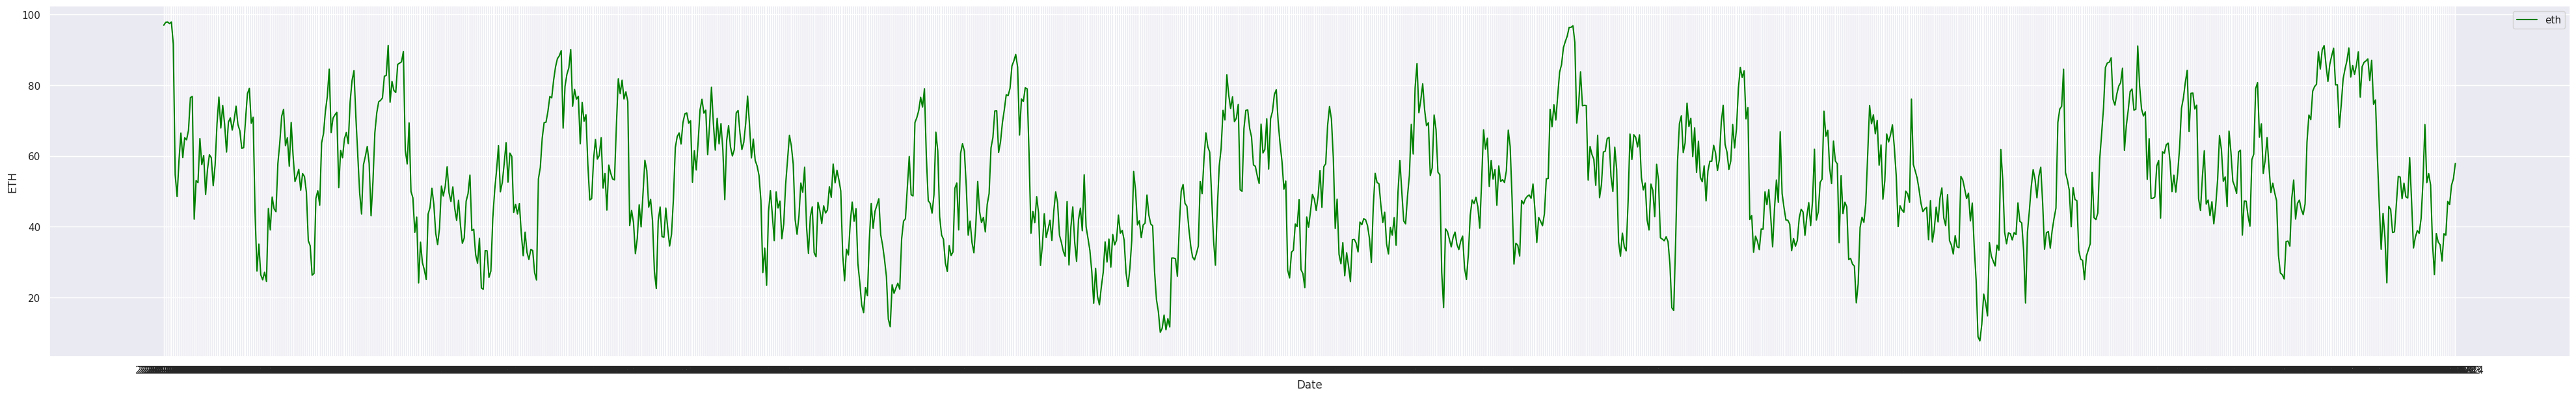

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize the  data using seaborn
sns.set(rc={'figure.figsize':(50,7)})

#sns.lineplot(x=df['Date'], y=df['USDT'])
#sns.lineplot(x=df['Date'], y=df['ETH'])
sns.lineplot(x=df['Date'], y=df['ETH'],color='green')


plt.legend(['eth'])

In [ ]:
# =============================================================================
# Data Processing
# =============================================================================

In [302]:
df1 = df[['Date', 'ETH']]

In [303]:
df1

,Date,ETH
13,2021-01-05,96.976862
14,2021-01-06,97.782056
15,2021-01-07,97.895415
16,2021-01-08,97.431988
17,2021-01-09,97.881390
...,...,...
1214,2024-04-20,47.162997
1215,2024-04-21,46.295326
1216,2024-04-22,51.741812
1217,2024-04-23,53.586314


In [304]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 13 to 1218
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1206 non-null   object 
 1   ETH     1206 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.0+ KB


In [305]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1[['ETH']]).reshape(-1,1))

In [306]:
print(df1)

[[0.98981013]
 [0.99874246]
 [1.        ]
 ...
 [0.48800004]
 [0.50846181]
 [0.55662907]]


In [307]:
training_size = int(len(df1) * 0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[:training_size], df1[training_size:]


In [308]:
training_size,test_size

(844, 362)

In [309]:
train_data

array([[0.98981013],
       [0.99874246],
       [1.        ],
       [0.99485902],
       [0.99984441],
       [0.93109843],
       [0.52119982],
       [0.45248308],
       [0.56547516],
       [0.65169828],
       [0.57456729],
       [0.63695246],
       [0.63061376],
       [0.66050949],
       [0.76291222],
       [0.7664212 ],
       [0.38154379],
       [0.50250696],
       [0.49635561],
       [0.63434684],
       [0.55271919],
       [0.58112133],
       [0.45901861],
       [0.53812625],
       [0.58350621],
       [0.57427972],
       [0.48646844],
       [0.55124152],
       [0.68138469],
       [0.76441161],
       [0.66752118],
       [0.73844848],
       [0.67979365],
       [0.59204723],
       [0.68591563],
       [0.69922998],
       [0.66103062],
       [0.69227062],
       [0.73593299],
       [0.67803152],
       [0.65924277],
       [0.6037847 ],
       [0.60561504],
       [0.69408669],
       [0.77508967],
       [0.79203625],
       [0.68255754],
       [0.701

In [310]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [311]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #3 mois precedents pour predire
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [312]:
print(X_train.shape), print(y_train.shape)

(743, 100)
(743,)


(None, None)

In [313]:
print(X_test.shape), print(ytest.shape)

(261, 100)
(261,)


(None, None)

In [314]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [315]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [316]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')


'''
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(92,3)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
'''

"\nmodel=Sequential()\nmodel.add(LSTM(50,return_sequences=True,input_shape=(92,3)))\nmodel.add(LSTM(50,return_sequences=True))\nmodel.add(LSTM(50))\nmodel.add(Dense(1))\nmodel.compile(loss='mean_squared_error',optimizer='adam')\n"

In [317]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_43 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_44 (LSTM)              (None, 50)                20200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [318]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 11s 342ms/step - loss: 0.2686 - val_loss: 0.1536
Epoch 2/50
12/12 [==============================] - 2s 193ms/step - loss: 0.1503 - val_loss: 0.1492
Epoch 3/50
12/12 [==============================] - 2s 201ms/step - loss: 0.1458 - val_loss: 0.1567
Epoch 4/50
12/12 [==============================] - 4s 349ms/step - loss: 0.1430 - val_loss: 0.1423
Epoch 5/50
12/12 [==============================] - 2s 194ms/step - loss: 0.1377 - val_loss: 0.1411
Epoch 6/50
12/12 [==============================] - 2s 194ms/step - loss: 0.1348 - val_loss: 0.1361
Epoch 7/50
12/12 [==============================] - 2s 195ms/step - loss: 0.1328 - val_loss: 0.1327
Epoch 8/50
12/12 [==============================] - 2s 196ms/step - loss: 0.1319 - val_loss: 0.1307
Epoch 9/50
12/12 [==============================] - 3s 300ms/step - loss: 0.1267 - val_loss: 0.1276
Epoch 10/50
12/12 [==============================] - 2s 192ms/step - loss: 0.1233 - val_loss: 0.132

In [319]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 39ms/step


In [320]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [321]:
### Calculate MAE performance metrics
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score

mean_absolute_error(y_train,train_predict)
#f1_score(y_train, train_predict, average='binary')

53.70984483543976

In [322]:
### Test Data MAE
math.sqrt(mean_absolute_error(ytest,test_predict))

7.5711724556223015

In [323]:
len(test_data)

362

In [324]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 21)

In [325]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [326]:
temp_input

[0.345589260346005,
 0.33709179268300643,
 0.3835929464704715,
 0.4999944003936295,
 0.6783167417400492,
 0.49630506397572705,
 0.524427319582027,
 0.48872829920982774,
 0.30635544551888133,
 0.20763368472699056,
 0.3363873848670108,
 0.3098544646854497,
 0.30129953529375497,
 0.2503589159385535,
 0.3359512289316137,
 0.3314742972198947,
 0.4372054501204906,
 0.42758003627936103,
 0.4880000377571545,
 0.5084618108749164,
 0.5566290683563593]

In [327]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [328]:
import matplotlib.pyplot as plt

In [329]:
len(df1)

1206

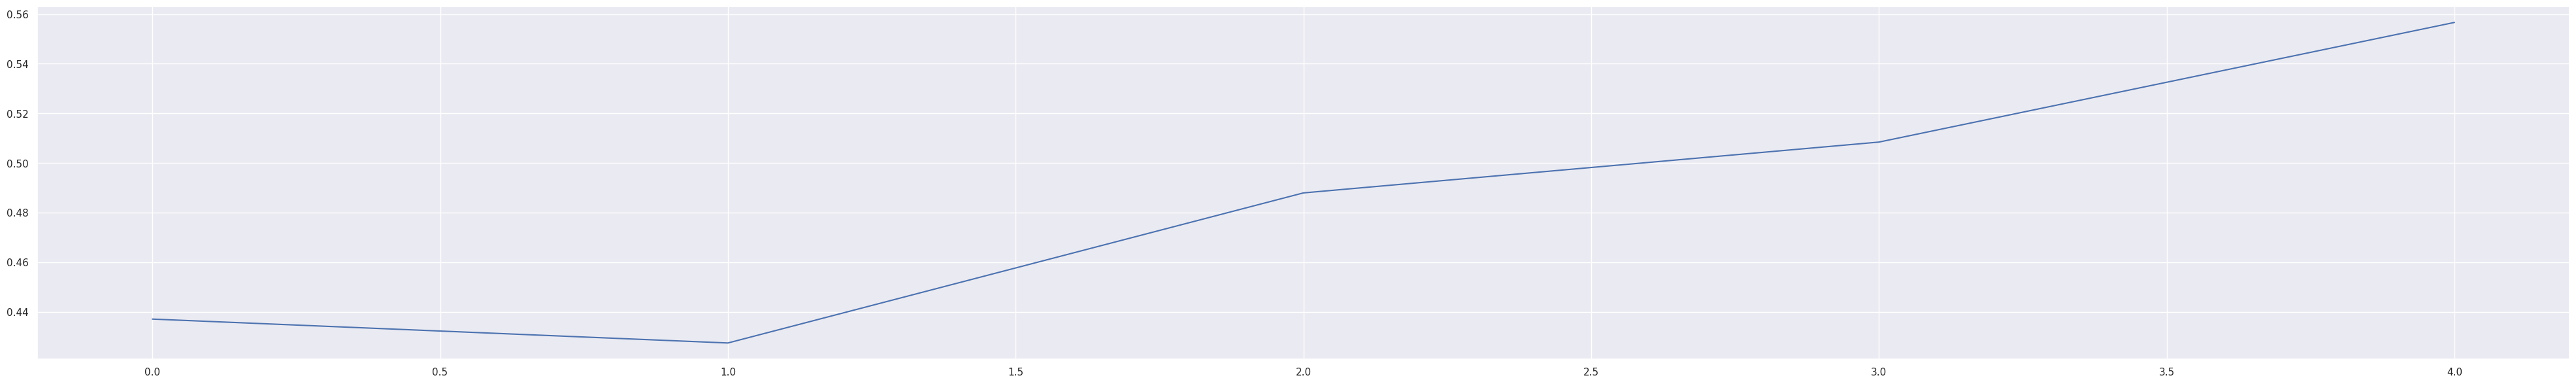

In [330]:
df3=df1.tolist()
df3.extend(df3)
plt.plot(df3[-5:])

In [331]:
df3=scaler.inverse_transform(df3).tolist()

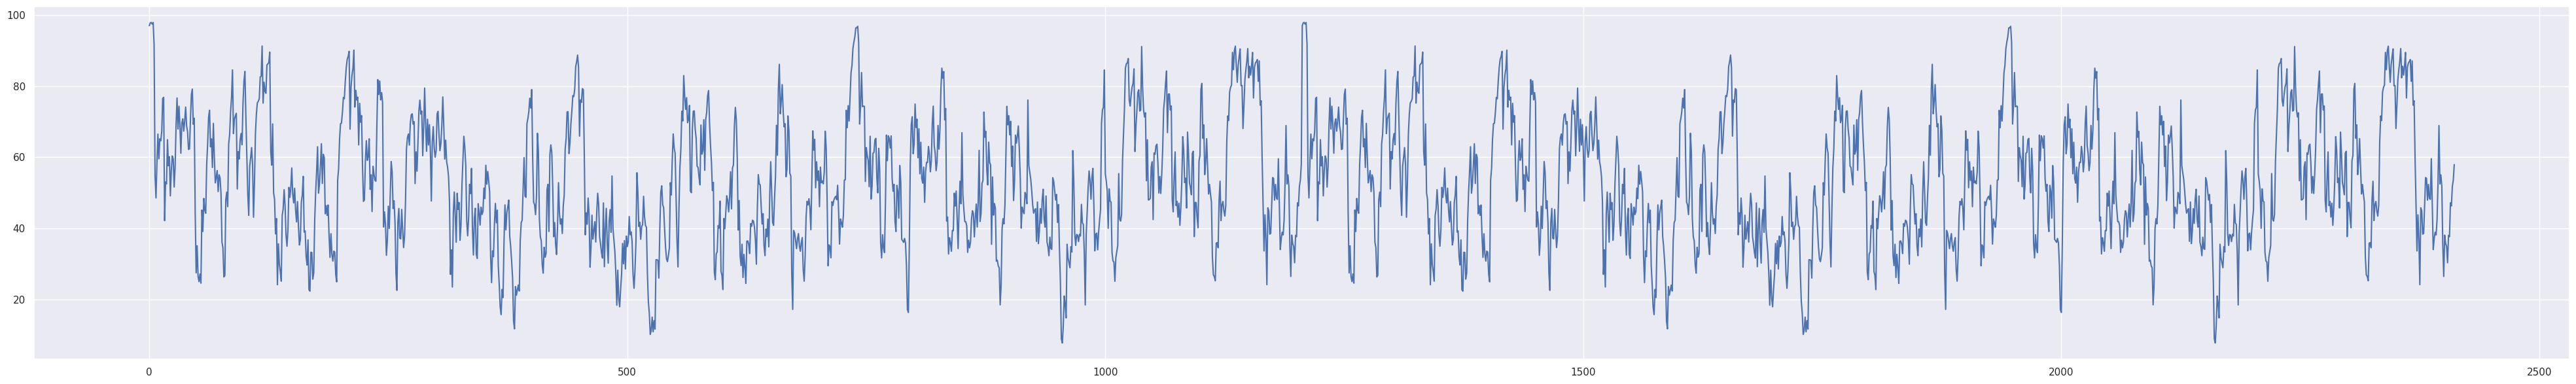

In [332]:
plt.plot(df3)

In [333]:
df3[-5:]


[[47.16299707454456],
 [46.29532605948336],
 [51.74181229659712],
 [53.58631350392984],
 [57.92829130160689]]

In [236]:
df['vol_btc'].tail(5)

1214    23097485495
1215    20506644853
1216    28282686673
1217    24310975583
1218    23939966976
Name: vol_btc, dtype: int64

In [237]:
#Compare the average 5 next days to the predicted
last=df['vol_btc'].tail(5)
print("real",last.mean())

last1=np.mean(df3[-5:])
print("predicted",last1)

diff=(last1-last)

print("Diff: ", diff)

#if diff>200000 Sell
#if 200000>diff>-200000 Hold
#if diff<-200000 Buy


'''
if diff>2000: s='Sell'
elif 2000>diff and diff>-2000:s='Hold'
elif diff<-2000:s='Buy'
print("DECISION: ",s)
'''

real 24027551916.0
predicted 29529768279.6
Diff:  1214    6.432283e+09
1215    9.023123e+09
1216    1.247082e+09
1217    5.218793e+09
1218    5.589801e+09
Name: vol_btc, dtype: float64


'\nif diff>2000: s=\'Sell\'\nelif 2000>diff and diff>-2000:s=\'Hold\'\nelif diff<-2000:s=\'Buy\'\nprint("DECISION: ",s)\n'